In [0]:
#importing useful libraries

import numpy as np
import pandas as pd
import seaborn as sns

In [0]:
#reading the dataset


url = "https://raw.github.com/mattdelhey/kaggle-titanic/master/Data/train.csv"
titanic = pd.read_csv(url)
titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
#to find number of entries and features

titanic.shape

#out of these 11 features 1 is the target feature.

(891, 11)

In [0]:
titanic.columns

#these features are present in my dataset.

Index(['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked'],
      dtype='object')

In [0]:
# this gives the information about the dataset. Hoe many nan values are there and what are the datatypes.


titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
survived    891 non-null int64
pclass      891 non-null int64
name        891 non-null object
sex         891 non-null object
age         714 non-null float64
sibsp       891 non-null int64
parch       891 non-null int64
ticket      891 non-null object
fare        891 non-null float64
cabin       204 non-null object
embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [0]:
#from the above cell i am seeing that 5 features have data as object which need to be encoded.
#some nan values are present there.

In [0]:
# to see the data distribution
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [0]:
# to find the number of missing values.

titanic.isnull().sum()

survived      0
pclass        0
name          0
sex           0
age         177
sibsp         0
parch         0
ticket        0
fare          0
cabin       687
embarked      2
dtype: int64

In [0]:
# from the cell above i observe that  the features named age,cabin and embarked has missing values.

## ***VISUALIZTION***

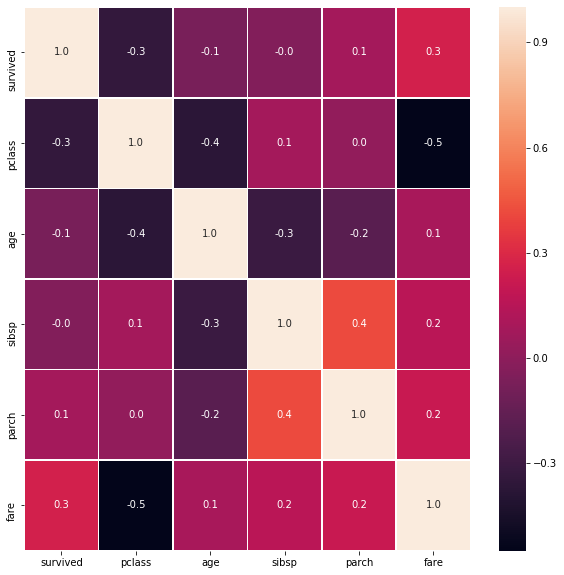

In [0]:
import matplotlib.pyplot as plt

f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(titanic.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [0]:
def woman_child_or_man(passenger):
    age, sex = passenger
    if age < 16:
        return "child"
    else:
        return dict(male="man", female="woman")[sex]

In [0]:
titanic["class"] = titanic.pclass.map({1: "First", 2: "Second", 3: "Third"})
titanic["who"] = titanic[["age", "sex"]].apply(woman_child_or_man, axis=1)
titanic["adult_male"] = titanic.who == "man"
titanic["deck"] = titanic.cabin.str[0]

In [0]:
titanic["alone"] = ~(titanic.parch + titanic.sibsp).astype(bool)


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


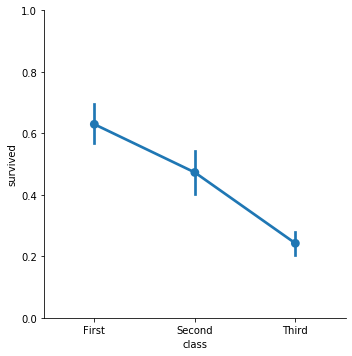

In [0]:
sns.factorplot("class", "survived", data=titanic, order=['First','Second','Third']).set(ylim=(0, 1))

#observe that the survival rate for third class is least, first class is most and second class is moderate.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


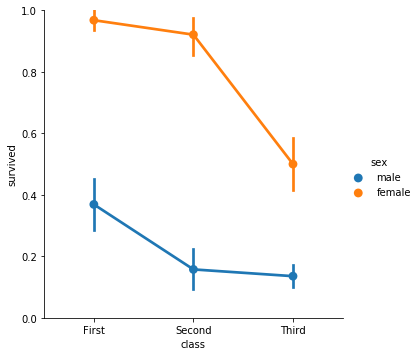

In [0]:
sns.factorplot("class", "survived", data=titanic, hue="sex",order=['First','Second','Third']).set(ylim=(0, 1));

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


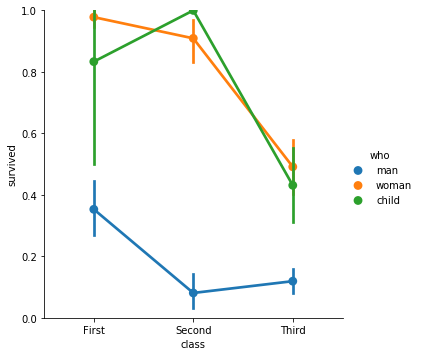

In [0]:
fg = sns.factorplot("class", "survived", data=titanic, hue="who", aspect=1, order=['First','Second','Third'])
fg.set(ylim=(0, 1))
fg.despine(left=False)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


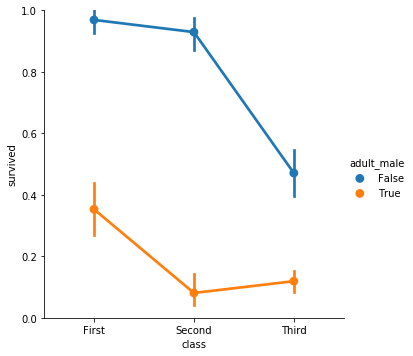

In [0]:
sns.factorplot("class", "survived", data=titanic, hue="adult_male", order=['First','Second','Third']).set(ylim=(0, 1))


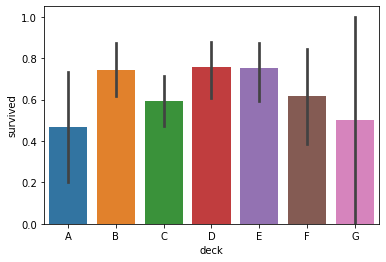

In [0]:
sns.barplot("deck", "survived", data=titanic,order=['A','B','C','D','E','F','G']);

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


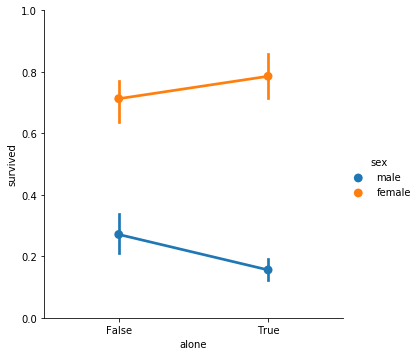

In [0]:
sns.factorplot("alone", "survived", data=titanic, hue="sex").set(ylim=(0, 1));

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


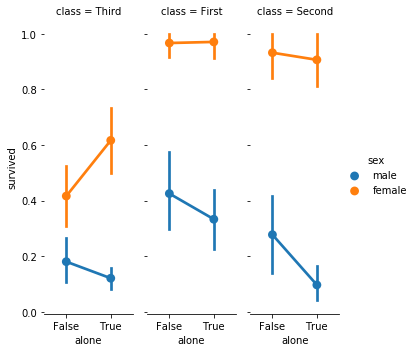

In [0]:
fg = sns.factorplot("alone", "survived", data=titanic, hue="sex",
                    col="class", aspect=.33)
fg.despine(left=True);

## ***PREPROCESSING***

In [0]:
#encoding deck

dk = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7}
titanic['deck']=titanic.deck.map(dk)

In [0]:
#imputing deck
titanic['deck']=titanic['deck'].fillna(0)

In [0]:
#imputing embarked

titanic['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [0]:
titanic['embarked']=titanic['embarked'].fillna('S')

In [0]:
# encoding embarked

e = {'S':3,'Q':2, 'C':1}
titanic['embarked']=titanic.embarked.map(e)

In [0]:
# encoding gender

genders = {"male": 0, "female": 1}
titanic['sex'] = titanic['sex'].map(genders)

In [0]:
#encoding who

wh = {'child':3,'woman':2, 'man':1}
titanic['who']=titanic.who.map(wh)

## ***ADDING NEW FEATURES***

In [0]:
def process_family(parameters):
     
    parch,sibsp=parameters
    
    # introducing a new feature : the size of families (including the passenger)
    family_size = parch+ sibsp + 1
    
    if (family_size==1):
      return 1 # for singleton
    elif(2<= family_size <= 4 ):
      return 2 #for small family
    else:
      return 3 #for big family  

In [0]:
titanic['FAM_SIZE']= titanic[['parch','sibsp']].apply(process_family, axis=1)

In [0]:
# to get title from the name.

titles = set()
for name in titanic['name']:
    titles.add(name.split(',')[1].split('.')[0].strip())

In [0]:
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

In [0]:
def get_titles():
    # we extract the title from each name
    titanic['title'] = titanic['name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    # a map of more aggregated title
    # we map each title
    titanic['title'] = titanic.title.map(Title_Dictionary)
    return titanic

In [0]:

titanic = get_titles()


In [0]:
titanic.columns

Index(['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'class', 'who', 'adult_male', 'deck',
       'alone', 'FAM_SIZE', 'title'],
      dtype='object')

In [0]:
## processing age


#summarize the Age grouped by sex, class and title
grouped_train = titanic.groupby(['sex','pclass','title'])
grouped_median_train = grouped_train.median()
grouped_median_train = grouped_median_train.reset_index()[['sex', 'pclass', 'title', 'age']]


In [0]:
grouped_median_train


,sex,pclass,title,age
0,0,1,Master,4.0
1,0,1,Mr,40.0
2,0,1,Officer,51.0
3,0,1,Royalty,40.0
4,0,2,Master,1.0
5,0,2,Mr,31.0
6,0,2,Officer,46.5
7,0,3,Master,4.0
8,0,3,Mr,26.0
9,1,1,Miss,30.0


In [0]:
#Assing the value of age for missing values based on the group.
#If a title is miising then the age will be assigned based on sex and class.

def fill_age(row):
    condition = (
        (grouped_median_train['sex'] == row['sex']) & 
        (grouped_median_train['title'] == row['title']) & 
        (grouped_median_train['pclass'] == row['pclass'])
    ) 
    if np.isnan(grouped_median_train[condition]['age'].values[0]):
        print('true')
        condition = (
            (grouped_median_train['sex'] == row['sex']) & 
            (grouped_median_train['pclass'] == row['pclass'])
        )

    return grouped_median_train[condition]['age'].values[0]

In [0]:
def process_age():
    # a function that fills the missing values of the Age variable
    titanic['age'] = titanic.apply(lambda row: fill_age(row) if np.isnan(row['age']) else row['age'], axis=1)
    return titanic

In [0]:
titanic=process_age()

In [0]:
titanic

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,class,who,adult_male,deck,alone,FAM_SIZE,title
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,3,Third,1,True,0.0,False,2,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,First,2,False,3.0,False,2,Mrs
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,3,Third,2,False,0.0,True,1,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,3,First,2,False,3.0,False,2,Mrs
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,3,Third,1,True,0.0,True,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,NaN,3,Second,1,True,0.0,True,1,Officer
887,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,B42,3,First,2,False,2.0,True,1,Miss
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,18.0,1,2,W./C. 6607,23.4500,NaN,3,Third,2,False,0.0,False,2,Miss
889,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C148,1,First,1,True,3.0,True,1,Mr


In [0]:
titles_dummies = pd.get_dummies(titanic['title'], prefix='title')
titanic = pd.concat([titanic, titles_dummies], axis=1)

In [0]:
drop_list=['name','ticket','fare','cabin','class','title']

titanic = titanic.drop(drop_list, axis=1)

In [0]:
titanic

,survived,pclass,sex,age,sibsp,parch,embarked,who,adult_male,deck,alone,FAM_SIZE,title_Master,title_Miss,title_Mr,title_Mrs,title_Officer,title_Royalty
0,0,3,0,22.0,1,0,3,1,True,0.0,False,2,0,0,1,0,0,0
1,1,1,1,38.0,1,0,1,2,False,3.0,False,2,0,0,0,1,0,0
2,1,3,1,26.0,0,0,3,2,False,0.0,True,1,0,1,0,0,0,0
3,1,1,1,35.0,1,0,3,2,False,3.0,False,2,0,0,0,1,0,0
4,0,3,0,35.0,0,0,3,1,True,0.0,True,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,3,1,True,0.0,True,1,0,0,0,0,1,0
887,1,1,1,19.0,0,0,3,2,False,2.0,True,1,0,1,0,0,0,0
888,0,3,1,18.0,1,2,3,2,False,0.0,False,2,0,1,0,0,0,0
889,1,1,0,26.0,0,0,1,1,True,3.0,True,1,0,0,1,0,0,0


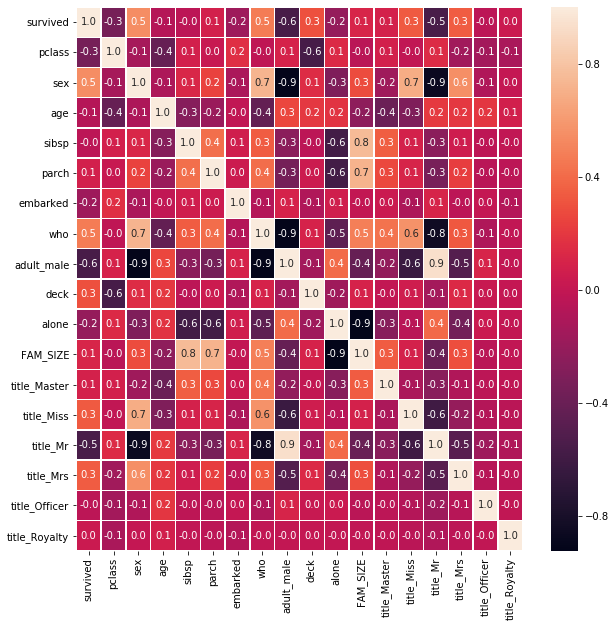

In [0]:
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(titanic.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

## ***Build and Train the Model***

In [0]:
X_train = titanic.drop("survived", axis=1)
Y_train = titanic["survived"]

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

**LOGISTIC REGRESSION**

In [0]:
# splitting data in training set(70%) and test set(30%).
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.3)


lr = LogisticRegression()
lr = lr.fit(x_train,y_train)
act = accuracy_score(y_train,lr.predict(x_train))
print('Train Accuracy is: ',(act*100))


Train Accuracy is:  83.62760834670947


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**RANDOM FOREST**

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.3)
#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 3, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features=0.5, 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)
clr_rf = clf_rf.fit(x_train,y_train)
act = accuracy_score(y_train,clf_rf.predict(x_train))
print('Train Accuracy is: ',(act*100))



Train Accuracy is:  89.24558587479936


**DECISION TREE**

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.3)
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
train_acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
print('Train Accuracy is: ',(train_acc_decision_tree))


Train Accuracy is:  95.18
